In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/gurgaon_properties_treated.csv')
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,...,1081.0,NaN,650.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2.0,2.0,2,...,NaN,NaN,1103.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3555 entries, 0 to 3554
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3555 non-null   object 
 1   society              3554 non-null   object 
 2   sector               3555 non-null   object 
 3   price                3555 non-null   float64
 4   price_per_sqft       3555 non-null   float64
 5   area                 3555 non-null   float64
 6   areaWithType         3555 non-null   object 
 7   bedRoom              3555 non-null   float64
 8   bathroom             3555 non-null   float64
 9   balcony              3555 non-null   object 
 10  floorNum             3538 non-null   float64
 11  facing               2544 non-null   object 
 12  agePossession        3555 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1587 non-null   float64
 15  carpet_area          1840 non-null   f

In [4]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

built_up_area

0.9543334024463681


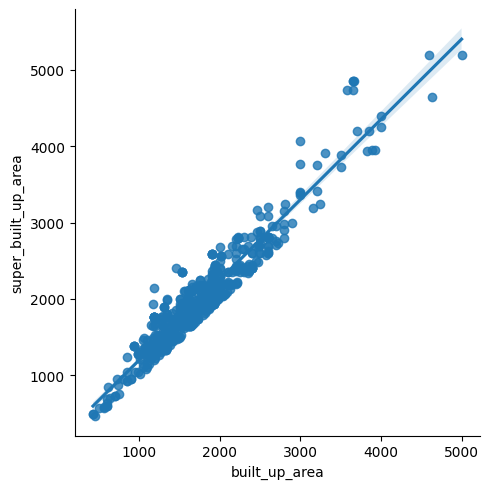

In [8]:
print(df['built_up_area'].corr(df['super_built_up_area']))
sns.lmplot(df, x='built_up_area', y='super_built_up_area')
plt.show()

0.9726294937744657


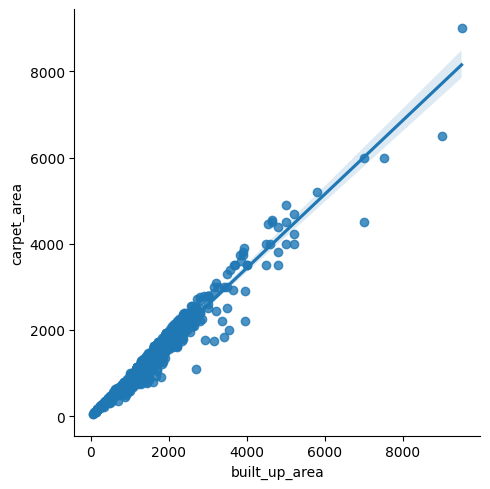

In [9]:
print(df['built_up_area'].corr(df['carpet_area']))
sns.lmplot(df, x='built_up_area', y='carpet_area')
plt.show()

In [14]:
# check if all 3 are missing
(df['built_up_area'].isnull() & df['super_built_up_area'].isnull() & df['carpet_area'].isnull()).sum()

0

In [15]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [16]:
all_present_df.shape

(531, 23)

In [18]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [19]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [20]:
sbc_df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,...,1081.0,NaN,650.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2.0,2.0,1,...,632.0,NaN,532.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [21]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

/var/folders/yq/5yv62gb931983s7ntw7b4gh00000gn/T/ipykernel_14762/1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [22]:
df.update(sbc_df)

In [23]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [24]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [25]:
sb_df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
5,flat,paras quartier,gwal pahari,7.5,14019.0,5350.0,Super Built up area 5350(497.03 sq.m.),4.0,4.0,3+,...,5350.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1.0,49.0
6,flat,experion the heartsong,sector 108,2.0,8554.0,2338.0,Super Built up area 2338(217.21 sq.m.),3.0,3.0,3+,...,2338.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,95.0


In [26]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
df.update(sb_df)
df.isnull().sum()

/var/folders/yq/5yv62gb931983s7ntw7b4gh00000gn/T/ipykernel_14762/530768585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [27]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
c_df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2.0,2.0,2,...,NaN,NaN,1103.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
11,flat,dlf regency park,sector 28,1.60,14545.0,1100.0,Carpet area: 1100 (102.19 sq.m.),2.0,2.0,2,...,NaN,NaN,1100.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0


In [28]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
df.update(c_df)
df.isnull().sum()

/var/folders/yq/5yv62gb931983s7ntw7b4gh00000gn/T/ipykernel_14762/2991717031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

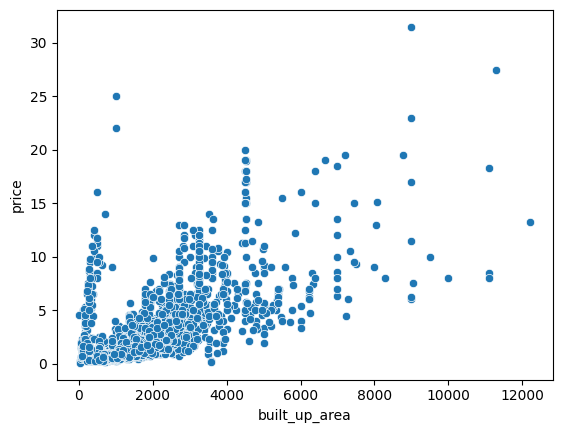

In [31]:
sns.scatterplot(df, x='built_up_area', y='price')
plt.show()

In [32]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [34]:
anamoly_df.sample(5)

,price,area,built_up_area
415,3.95,2343.0,1900.0
2004,3.29,1828.0,1654.0
1393,4.75,1650.0,1700.0
1082,6.75,2088.0,232.0
2620,2.60,1080.0,1080.0


In [35]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [36]:
df.update(anamoly_df)

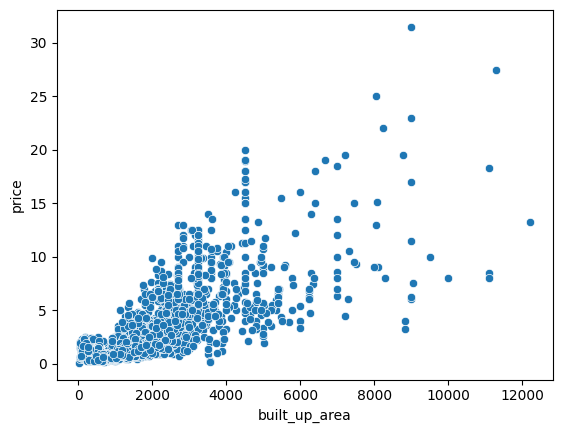

In [37]:
sns.scatterplot(df, x='built_up_area', y='price')
plt.show()

In [40]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'],inplace=True)

In [41]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,NaN,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,NaN,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,NaN,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,North-West,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,North-East,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [42]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [44]:
df[df['floorNum'].isnull()]['property_type'].value_counts()

house    15
flat      2
Name: property_type, dtype: int64

In [ ]:
df[df['floorNum'].isnull()]['property_type'].value_counts()

In [46]:
fl_val = df[df['property_type'] == 'house']['floorNum'].median()
df['floorNum'].fillna(fl_val,inplace=True)
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

facing

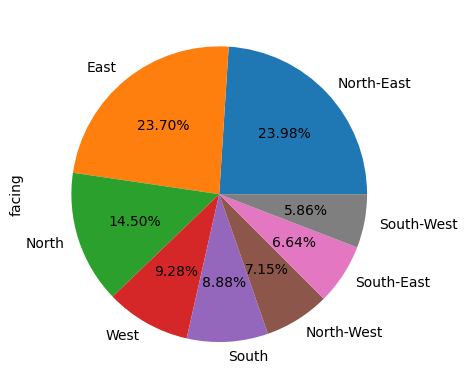

In [49]:
df['facing'].value_counts().plot(kind='pie', autopct='%0.2f%%')
plt.show()

In [50]:
df.drop(columns=['facing'],inplace=True)
# we could put one more value named 'other' in it. Would have been a better choice

In [51]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2536,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df.drop(index=[2536],inplace=True)

In [53]:
df['agePossession'].value_counts()

Relatively New        1605
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     263
Name: agePossession, dtype: int64

In [55]:
df[df['agePossession'] == 'Undefined'].sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1545,house,independent,sector 105,0.55,10913.0,2.0,4.0,0,2.0,Undefined,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1406,house,independent,sector 3,0.92,15257.0,4.0,1.0,0,1.0,Undefined,603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3447,house,independent,sector 12,0.90,13333.0,2.0,4.0,0,2.0,Undefined,675.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2828,flat,ansal plaza,sector 2,1.00,10000.0,2.0,3.0,0,1.0,Undefined,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
354,flat,dlf the arbour,sector 63,8.50,21519.0,4.0,4.0,0,27.0,Undefined,3950.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0


In [56]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [57]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [58]:
df['agePossession'].value_counts()

Relatively New        1717
New Property           597
Moderately Old         584
Old Property           326
Under Construction     277
Undefined               53
Name: agePossession, dtype: int64

In [60]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [61]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [62]:
df['agePossession'].value_counts()

Relatively New        1726
New Property           598
Moderately Old         591
Old Property           329
Under Construction     277
Undefined               33
Name: agePossession, dtype: int64

In [64]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [67]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [68]:
df['agePossession'].value_counts()

Relatively New        1728
Moderately Old         622
New Property           598
Old Property           329
Under Construction     277
Name: agePossession, dtype: int64

In [69]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [70]:
df.shape

(3554, 18)

In [71]:
df.to_csv('./data/gurgaon_properties_missing_value_imputation.csv',index=False)